In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, balanced_accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("./../prepared datasets/train.csv")
test = pd.read_csv("./../prepared datasets/test.csv")

In [3]:
train.drop("person_id", axis=1, inplace=True)
X_train = train.drop("diabetes", axis=1)
y_train = np.array(train.loc[:, ["diabetes"]]).reshape(X_train.shape[0],)

In [4]:
X_test = test.drop(["diabetes", "person_id"], axis=1)
y_test = np.array(test.loc[:, ["diabetes"]]).reshape(X_test.shape[0],)

In [6]:
# 3-fold cross validation of feature selection
C = [10000, 1000, 100, 10, 1, 0.1]
features_ = []
ba = []
ba_avg = []
for C_ in C:
    #print(C_)
    sel_ = SelectFromModel(LogisticRegression(C=C_, penalty='l1', solver='liblinear'))
    sel_.fit(X_train, y_train)
    selected_feat = X_train.columns[(sel_.get_support())]
    X_sel = X_train.loc[:, selected_feat]
    #print(X_sel.shape)
    lg = LogisticRegression(C=C_, penalty='l1', solver='liblinear')
    skf = StratifiedKFold(n_splits=3)
    skf.get_n_splits(X_train, y_train)
    ba_score = cross_val_score(lg, X_sel, y_train, scoring="balanced_accuracy", cv=skf)
    features_.append(selected_feat)
    ba.append(ba_score)
    ba_avg.append(np.mean(ba_score))
    #print(np.mean(f1_score))

In [9]:
# Create dataset after feature selection
X_train_feature_selection = X_train.loc[:, features_[np.argmax(ba_avg)]]
train_after_selection = pd.concat([X_train_feature_selection, train.loc[:, ["diabetes"]]], axis=1)
train_after_selection.to_csv("./../prepared datasets/train_after_selection.csv", index=False)

In [41]:
# Support Vector Machine
# define the model
params = {
        'kernel' : ['poly', 'rbf', 'sigmoid'],
        'gamma' : ["scale"],
        'C' : [100, 50, 10, 1.0, 0.1, 0.01],
        'class_weight': [None, {0:3}, {0:4}, {0:5}, {0:6}, {0:7}]
    }
def show_result(X_train, y_train, X_test, y_test, params, feature_selection = False):
    clf = SVC(random_state=1)

    skf = StratifiedKFold(n_splits=5, random_state=1)
    search = GridSearchCV(clf, param_grid=params, scoring="balanced_accuracy",
                          n_jobs=1, cv = skf, refit=True, verbose=10)
    
    search.fit(X_train, y_train)
    print("Best Parameter: ", search.best_params_)
    
    # calculate performance metrics
    pred = search.predict(X_test)
    ba = balanced_accuracy_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average="weighted")
    precision = precision_score(y_test, pred, average="weighted")
    recall = recall_score(y_test, pred, average="weighted")
    
    print("Balanced Accuracy: ", ba)
    print("Raw Accuracy: ", accuracy)
    print("F1_score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    
    # Draw ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, pred)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = {:0.4f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if feature_selection == True:
        plt.title('ROC Curve -- SVM (with feature selection)')
    else:
        plt.title('ROC Curve -- SVM (without feature selection)')
    plt.legend(loc="lower right")
    plt.show()

## Train model before feature selection

In [42]:
# Create dataset
train = pd.read_csv("./../prepared datasets/train.csv")
test = pd.read_csv("./../prepared datasets/test.csv")

# Remove person_id
train.drop("person_id", axis=1, inplace=True)
X_train = train.drop("diabetes", axis=1)
y_train = np.array(train.loc[:, ["diabetes"]]).reshape(X_train.shape[0],)

X_test = test.drop(["diabetes", "person_id"], axis=1)
y_test = np.array(test.loc[:, ["diabetes"]]).reshape(X_test.shape[0],)

/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.482, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.557, total=   0.2s
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.481, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.565, total=   0.2s
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.561, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s


[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.541, total=   0.2s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.526, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s


[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.471, total=   0.2s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.494, total=   0.2s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s


[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.508, total=   0.2s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.493, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.472, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.493, total=   0.2s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.465, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.513, total=   0.1s
[CV] C=100, class_weight={0: 3}, gamma=scale, kernel=poly ............
[CV]  C=100, class_weight={0: 3}, gamma=scale, ker

[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.481, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.546, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.561, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.541, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.526, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.471, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=r

[CV]  C=50, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.466, total=   0.1s
[CV] C=50, class_weight={0: 3}, gamma=scale, kernel=sigmoid ..........
[CV]  C=50, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.475, total=   0.1s
[CV] C=50, class_weight={0: 3}, gamma=scale, kernel=sigmoid ..........
[CV]  C=50, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.563, total=   0.1s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.477, total=   0.1s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.557, total=   0.1s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.481, total=   0.1s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, ker

[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=poly, score=0.571, total=   0.2s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=rbf ..............
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.541, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=rbf ..............
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.501, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=rbf ..............
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.471, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=rbf ..............
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.494, total=   0.2s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=rbf ..............
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.518, total=   0.2s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid ..........
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid, s

[CV]  C=10, class_weight={0: 4}, gamma=scale, kernel=sigmoid, score=0.457, total=   0.1s
[CV] C=10, class_weight={0: 4}, gamma=scale, kernel=sigmoid ..........
[CV]  C=10, class_weight={0: 4}, gamma=scale, kernel=sigmoid, score=0.533, total=   0.1s
[CV] C=10, class_weight={0: 4}, gamma=scale, kernel=sigmoid ..........
[CV]  C=10, class_weight={0: 4}, gamma=scale, kernel=sigmoid, score=0.600, total=   0.2s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=poly .............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.506, total=   0.3s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=poly .............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.517, total=   0.2s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=poly .............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.531, total=   0.2s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=poly .............
[CV]  C=10, class_weight={0: 5}, gamma=scale, ker

[CV]  C=1.0, class_weight=None, gamma=scale, kernel=rbf, score=0.500, total=   0.1s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=rbf, score=0.500, total=   0.1s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=rbf, score=0.500, total=   0.1s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=sigmoid, score

[CV]  C=1.0, class_weight={0: 5}, gamma=scale, kernel=sigmoid, score=0.619, total=   0.1s
[CV] C=1.0, class_weight={0: 5}, gamma=scale, kernel=sigmoid .........
[CV]  C=1.0, class_weight={0: 5}, gamma=scale, kernel=sigmoid, score=0.620, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.557, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.562, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.532, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.588, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale,

[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=rbf, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=rbf .............
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=rbf, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=rbf .............
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=rbf .............
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=rbf, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid .........
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid .........
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid .........
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, ker

[CV]  C=0.1, class_weight={0: 6}, gamma=scale, kernel=sigmoid, score=0.506, total=   0.2s
[CV] C=0.1, class_weight={0: 6}, gamma=scale, kernel=sigmoid .........
[CV]  C=0.1, class_weight={0: 6}, gamma=scale, kernel=sigmoid, score=0.517, total=   0.2s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly ............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly, score=0.549, total=   0.2s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly ............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly, score=0.489, total=   0.1s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly ............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly, score=0.504, total=   0.2s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly ............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly, score=0.574, total=   0.1s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly ............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale,

[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf ............
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf ............
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf ............
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf ............
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid ........
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid ........
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, 

[CV]  C=0.01, class_weight={0: 7}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 7}, gamma=scale, kernel=sigmoid ........
[CV]  C=0.01, class_weight={0: 7}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 7}, gamma=scale, kernel=sigmoid ........
[CV]  C=0.01, class_weight={0: 7}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.2s
Best Parameter:  {'C': 0.1, 'class_weight': {0: 5}, 'gamma': 'scale', 'kernel': 'sigmoid'}


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.3min finished


Balanced Accuracy:  0.594251968503937
Raw Accuracy:  0.5098684210526315
F1_score:  0.5674220760080073
Precision:  0.782202216066482
Recall:  0.5098684210526315
Confusion Matrix:
 [[ 36  14]
 [135 119]]


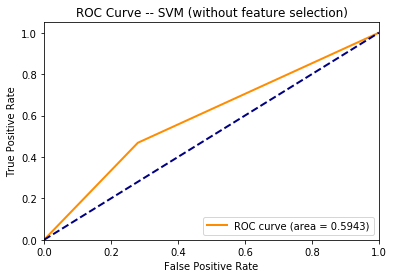

In [43]:
show_result(X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            params=params,
            feature_selection=False)

## Train model after feature selection

In [44]:
train_after_feature_selection = pd.read_csv("./../prepared datasets/train_after_selection.csv")

In [45]:
X_train = train_after_feature_selection.drop("diabetes", axis=1)
y_train = np.array(train_after_feature_selection.loc[:, ["diabetes"]]).reshape(X_train.shape[0],)

In [46]:
# Create test set, keep y_test the same
X_test = test.loc[:, X_train.columns]

/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.502, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.551, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.497, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.584, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=poly ..............
[CV]  C=100, class_weight=None, gamma=scale, kernel=poly, score=0.632, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.536, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.497, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.486, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s


[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.561, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=rbf ...............
[CV]  C=100, class_weight=None, gamma=scale, kernel=rbf, score=0.595, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.523, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s


[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.522, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.602, total=   0.1s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.445, total=   0.0s
[CV] C=100, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=100, class_weight=None, gamma=scale, kernel=sigmoid, score=0.532, total=   0.1s
[CV] C=100, class_weight={0: 3}, gamma=scale, kernel=poly ............
[CV]  C=100, class_weight={0: 3}, gamma=scale, kernel=poly, score=0.507, total=   0.2s
[CV] C=100, class_weight={0: 3}, gamma=scale, kernel=poly ............
[CV]  C=100, class_weight={0: 3}, gamma=scale, kernel=poly, score=0.551, total=   0.3s
[CV] C=100, class_weight={0: 3}, gamma=scale, kernel=poly ............
[CV]  C=100, class_weight={0: 3}, gamma=scale, k

[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.604, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.536, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.497, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.486, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.561, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.595, total=   0.1s
[CV] C=100, class_weight={0: 6}, gamma=scale, kernel=sigmoid .........
[CV]  C=100, class_weight={0: 6}, gamma=scale, kernel=sig

[CV]  C=50, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.533, total=   0.1s
[CV] C=50, class_weight={0: 3}, gamma=scale, kernel=sigmoid ..........
[CV]  C=50, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.592, total=   0.1s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.512, total=   0.1s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.526, total=   0.2s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.497, total=   0.1s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.555, total=   0.2s
[CV] C=50, class_weight={0: 4}, gamma=scale, kernel=poly .............
[CV]  C=50, class_weight={0: 4}, gamma=scale, kernel

[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.486, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=rbf ..............
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.561, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=rbf ..............
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.576, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid ..........
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid, score=0.468, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid ..........
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid, score=0.566, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid ..........
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid, score=0.544, total=   0.1s
[CV] C=50, class_weight={0: 7}, gamma=scale, kernel=sigmoid ..........
[CV]  C=50, class_weight={0: 7}, gamma=scale, kernel

[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.506, total=   0.1s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=poly .............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.561, total=   0.1s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=poly .............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.526, total=   0.1s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=poly .............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.618, total=   0.1s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=poly .............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.580, total=   0.1s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=rbf ..............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=rbf, score=0.541, total=   0.1s
[CV] C=10, class_weight={0: 5}, gamma=scale, kernel=rbf ..............
[CV]  C=10, class_weight={0: 5}, gamma=scale, kernel=rbf, s

[CV]  C=1.0, class_weight=None, gamma=scale, kernel=rbf, score=0.500, total=   0.2s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=1.0, class_weight=None, gamma=scale, kernel=sigmoid ...........
[CV]  C=1.0, class_weight=None, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=1.0, class_weight={0: 3}, gamma=scale, kernel=poly ............
[CV]  C=1.0, class_weight={0: 3}, gamma=scale, ker

[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.562, total=   0.2s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.646, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly ............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=poly, score=0.537, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.552, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.538, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=rbf, score=0.588, total=   0.1s
[CV] C=1.0, class_weight={0: 6}, gamma=scale, kernel=rbf .............
[CV]  C=1.0, class_weight={0: 6}, gamma=scale, kernel=r

[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid .........
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid .........
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid .........
[CV]  C=0.1, class_weight={0: 3}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 4}, gamma=scale, kernel=poly ............
[CV]  C=0.1, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 4}, gamma=scale, kernel=poly ............
[CV]  C=0.1, class_weight={0: 4}, gamma=scale, kernel=poly, score=0.500, total=   0.1s
[CV] C=0.1, class_weight={0: 4}, gamma=scale, kernel=poly ............
[CV]  C=0.1, class_weight={0: 4}, gamma=

[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=poly, score=0.502, total=   0.3s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf .............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.558, total=   0.3s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf .............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.505, total=   0.1s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf .............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.533, total=   0.2s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf .............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.529, total=   0.1s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf .............
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=rbf, score=0.510, total=   0.1s
[CV] C=0.1, class_weight={0: 7}, gamma=scale, kernel=sigmoid .........
[CV]  C=0.1, class_weight={0: 7}, gamma=scale, kernel=sig

[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid ........
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid ........
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.1s
[CV] C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid ........
[CV]  C=0.01, class_weight={0: 4}, gamma=scale, kernel=sigmoid, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 5}, gamma=scale, kernel=poly ...........
[CV]  C=0.01, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 5}, gamma=scale, kernel=poly ...........
[CV]  C=0.01, class_weight={0: 5}, gamma=scale, kernel=poly, score=0.500, total=   0.2s
[CV] C=0.01, class_weight={0: 5}, gamma=scale, kernel=poly ...........
[CV]  C=0.01, class_weight={0: 5},

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.1min finished


Best Parameter:  {'C': 1.0, 'class_weight': {0: 5}, 'gamma': 'scale', 'kernel': 'sigmoid'}
Balanced Accuracy:  0.6007086614173229
Raw Accuracy:  0.6414473684210527
F1_score:  0.6853575225027482
Precision:  0.7742122211194483
Recall:  0.6414473684210527
Confusion Matrix:
 [[ 27  23]
 [ 86 168]]


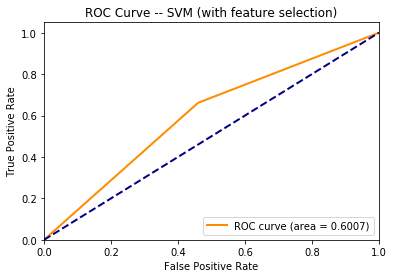

In [47]:
show_result(X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            params=params,
            feature_selection=True)